In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches


# Training data preparation 

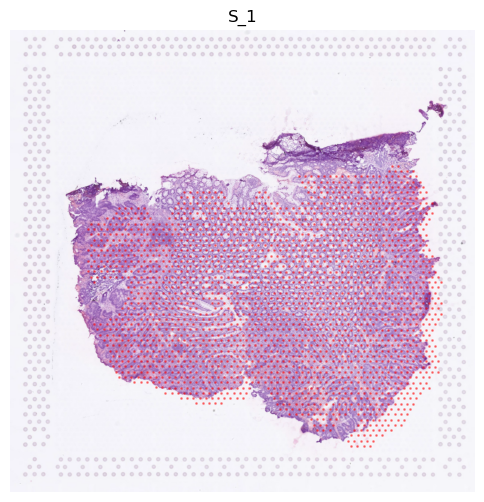

In [3]:
with h5py.File("../../elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_1'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    
    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

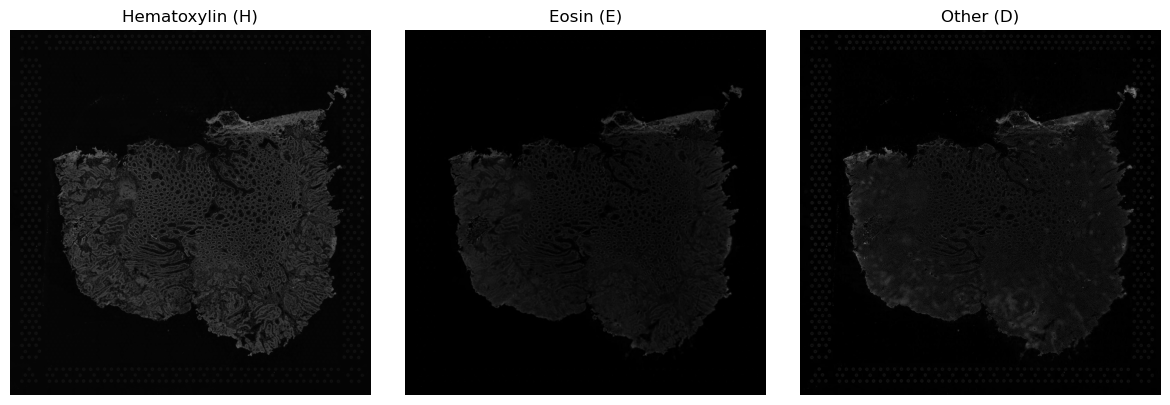

In [4]:
from skimage import img_as_float
from skimage.color import separate_stains, hed_from_rgb
import matplotlib.pyplot as plt

def deconvolve_patch(patch):
    """
    將輸入的 PIL.Image patch 轉換為 numpy array，
    然後進行顏色解卷積，並返回各個通道。
    """
    # 先將 PIL image 轉成 numpy float 陣列 (範圍 0~1)
    patch_np = img_as_float(np.array(patch))
    
    # 進行解卷積 (HED 轉換)
    stains = separate_stains(patch_np, hed_from_rgb)
    # stains 第一通道為 Hematoxylin，第二通道為 Eosin，第三通道為 DAB/其他（根據資料而定）
    return stains

# 以其中一個 patch 為例進行顏色解卷積
sample_patch = image
stains = deconvolve_patch(sample_patch)

# 顯示各個通道
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
channel_names = ['Hematoxylin (H)', 'Eosin (E)', 'Other (D)']
for i, ax in enumerate(axes):
    ax.imshow(stains[:, :, i], cmap='gray')
    ax.set_title(channel_names[i])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [3]:

# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("../processed_train_spots.h5", "r") as f:
    train_spots = f["spots/Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df
        print(slide_name)

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

S_1
S_2
S_3
S_4
S_5
S_6


,x,y,zscore_log2_filtered_C1,zscore_log2_filtered_C2,zscore_log2_filtered_C3,zscore_log2_filtered_C4,zscore_log2_filtered_C5,zscore_log2_filtered_C6,zscore_log2_filtered_C7,zscore_log2_filtered_C8,...,zscore_log2_filtered_C26,zscore_log2_filtered_C27,zscore_log2_filtered_C28,zscore_log2_filtered_C29,zscore_log2_filtered_C30,zscore_log2_filtered_C31,zscore_log2_filtered_C32,zscore_log2_filtered_C33,zscore_log2_filtered_C34,zscore_log2_filtered_C35
0,1554,1297,-0.550449,-0.388741,-0.521670,-0.395556,0.041353,-0.377616,-0.480974,-0.425614,...,-0.332686,-0.386416,-0.438671,0.058154,-0.326004,-0.470877,-0.395761,-0.414616,-0.458054,0.285658
1,462,1502,-0.252599,1.325190,-0.133434,-0.055322,3.042272,-0.136190,1.834350,-0.084514,...,-0.390380,-0.072800,-0.495253,1.409805,-0.322850,1.992624,0.684069,0.052298,-0.217160,0.272189
2,1488,1548,-0.205277,-0.674113,-0.345319,-0.383942,0.692458,-0.046588,-0.663815,-0.560429,...,-0.498652,2.859325,-0.292803,-0.485141,-0.330604,-0.655365,-0.692722,0.071584,-0.553397,-0.555202
3,1725,1182,-0.333105,1.757424,-0.219262,-0.292671,-0.386816,4.793969,-0.374384,2.418432,...,-0.159475,2.711371,-0.182461,3.240235,-0.323480,1.516572,2.267808,0.009402,-0.424123,1.809804
4,581,1113,-0.218540,-0.272962,-0.182562,-0.019460,2.223214,-0.367094,-0.139357,-0.455011,...,-0.502992,-0.270294,-0.528270,-0.022186,-0.010180,-0.239397,-0.460640,-0.476132,-0.582377,-0.610574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1055,701,-0.451227,0.314486,-0.384492,-0.392263,-0.837842,-0.377616,0.394376,3.379213,...,0.847291,-0.386416,-0.438671,-0.441601,-0.328091,-0.263020,0.884288,-0.066184,-0.140140,2.082720
2193,1225,862,-0.382025,0.396062,0.204579,-0.399497,-0.831806,-0.377616,0.177558,0.617416,...,-0.406378,-0.386416,-0.438671,-0.441601,-0.330437,-0.270647,0.989378,3.205969,0.891659,-0.369520
2194,765,1479,-0.041443,-0.512512,0.029668,-0.384751,-0.607815,-0.398494,-0.778861,-0.571057,...,-0.468298,-0.402106,-0.532800,-0.540277,-0.312161,-0.582263,-0.672331,-0.485337,-0.581203,-0.767235
2195,607,1525,-0.585751,0.792560,-0.549642,-0.409421,0.924046,-0.400870,-0.364165,-0.216717,...,-0.265914,-0.320772,-0.289464,-0.441601,-0.037919,0.057492,0.892778,0.724996,-0.583898,-0.301057


In [4]:
def extract_tile(slide_img, x, y, tile_size=224):
    half = tile_size // 2
    x1, x2 = x - half, x + half
    y1, y2 = y - half, y + half
    tile = slide_img[y1:y2, x1:x2]  # shape: (224, 224, 3)
    return tile
def get_spots_in_tile(df, center_x, center_y, tile_size):
    half = tile_size // 2
    x_min, x_max = center_x - half, center_x + half
    y_min, y_max = center_y - half, center_y + half

    df_in_tile = df[
        (df['x'] >= x_min) & (df['x'] <= x_max) &
        (df['y'] >= y_min) & (df['y'] <= y_max)
    ].copy()

    df_in_tile = df_in_tile[
        ~((df_in_tile['x'] == center_x) & (df_in_tile['y'] == center_y))
    ]

    return df_in_tile

    return df_in_tile

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_tile_with_spots(
    slide_image, spot_df, center_x, center_y,
    tile_size=78, stride=None, grid_size=None,
    spot_radius_px=15
):
    """
    可視化一個 tile，包含中心 spot、鄰近 spot，以及可選的 N×N 子區格線。

    Parameters:
    - slide_image: 該張切片的影像 (numpy array, H x W x 3)
    - spot_df: 包含所有落在 tile 內的 spots（已排除中心點）
    - center_x, center_y: 中心 spot 的 slide 座標
    - tile_size: 單一 tile 的大小（像素）
    - stride: tile 間距（默認等於 tile_size，表示無重疊）
    - grid_size: 幾乘幾的 tile（如果 None，就只畫單 tile）
    - spot_radius_px: 中心 spot 畫圓半徑
    """

    if stride is None:
        stride = tile_size

    if grid_size:
        full_tile_size = tile_size + stride * (grid_size - 1)
    else:
        full_tile_size = tile_size

    center_color = 'red'
    neighbor_color = 'orange'
    show_legend = True
    title = f"{len(spot_df)} neighbors in tile"

    # 擷取 tile
    def extract_tile(slide_img, x, y, total_size):
        x, y = int(x), int(y)
        half = total_size // 2
        x1, x2 = x - half, x + half
        y1, y2 = y - half, y + half
        tile = slide_img[y1:y2, x1:x2]
        return tile

    tile = extract_tile(slide_image, center_x, center_y, full_tile_size)

    # 畫圖
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(tile)

    # 畫格線
    # 畫出每個 tile 的實際切割框
    if grid_size:
        for row in range(grid_size):
            for col in range(grid_size):
                x0 = col * stride
                y0 = row * stride
                rect = patches.Rectangle(
                    (x0, y0),
                    tile_size, tile_size,
                    linewidth=1,
                    edgecolor='blue',
                    facecolor='none',
                    linestyle='--'
                )
                ax.add_patch(rect)


    # 中心 spot（固定畫在 tile 中央）
    center_px = full_tile_size // 2
    ax.scatter(center_px, center_px, c=center_color, s=40, label='Center Spot')

    # 中心 spot 圓圈
    circle = patches.Circle(
        (center_px, center_px),
        spot_radius_px,
        linewidth=1.5,
        edgecolor='yellow',
        facecolor='none'
    )
    ax.add_patch(circle)

    # 鄰居 spots（轉成 tile 內相對座標）
    for _, neighbor in spot_df.iterrows():
        dx = int(neighbor['x']) - center_x
        dy = int(neighbor['y']) - center_y
        tile_x = center_px + dx
        tile_y = center_px + dy
        ax.scatter(tile_x, tile_y, c=neighbor_color, s=20)

    ax.axis('off')
    if show_legend:
        ax.legend(loc='upper right')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


## calculate tile_size

In [5]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

train_spacing_per_slide = {}

for slide_id, df in train_spot_tables.items():
    coords = df[['x', 'y']].values
    if len(coords) < 2:
        print(f"⚠️ Slide {slide_id} has less than 2 spots, skipping.")
        continue

    dist_matrix = squareform(pdist(coords))
    np.fill_diagonal(dist_matrix, np.inf)
    min_dists = dist_matrix.min(axis=1)
    mean_spacing = min_dists.mean()

    train_spacing_per_slide[slide_id] = mean_spacing
    print(f"📏 {slide_id}: 平均 spot 間距 = {mean_spacing:.2f} pixels")




📏 S_1: 平均 spot 間距 = 25.90 pixels
📏 S_2: 平均 spot 間距 = 25.91 pixels
📏 S_3: 平均 spot 間距 = 25.20 pixels
📏 S_4: 平均 spot 間距 = 25.02 pixels
📏 S_5: 平均 spot 間距 = 25.01 pixels
📏 S_6: 平均 spot 間距 = 25.24 pixels


## show image

In [6]:
tile_size = round(max(train_spacing_per_slide.values())*3)  # → round(77.7) → 78
print(f"\n🔍 所有 slide tile size {tile_size} pixels")

df = train_spot_tables['S_1']
row = df.iloc[0]

x = int(row['x'])
y = int(row['y'])

# 取得tile範圍內的spot們
neighbors_df = get_spots_in_tile(df, x, y, tile_size=tile_size*3)

print(f"Found {len(neighbors_df)} spots in this tile.")
print(neighbors_df[['x', 'y']])
print(x,y)
tile_size


🔍 所有 slide tile size 78 pixels
Found 91 spots in this tile.
         x     y
24    1541  1365
50    1449  1388
74    1620  1274
89    1541  1182
103   1646  1274
...    ...   ...
2132  1541  1274
2142  1514  1228
2148  1580  1205
2173  1593  1320
2178  1646  1320

[91 rows x 2 columns]
1554 1297


78

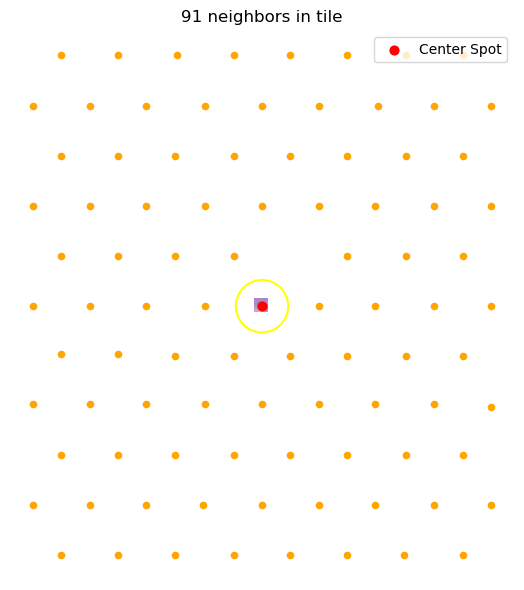

In [7]:
plot_tile_with_spots(
    slide_image=image,
    spot_df=neighbors_df,
    center_x=x,
    center_y=y,
    tile_size=6,
    #grid_size=3,
    spot_radius_px=12
)


## Start tiling

In [8]:
def split_into_subtiles(tile, grid_size=3):
    """
    把一張 tile (H, W, 3) 切成 grid_size x grid_size 個 sub-tiles
    回傳 list of sub-tiles，每個 shape 為 (H/grid_size, W/grid_size, 3)
    """
    H, W, C = tile.shape
    assert H % grid_size == 0 and W % grid_size == 0, "Tile size must be divisible by grid size"

    h_step, w_step = H // grid_size, W // grid_size
    subtiles = []

    for i in range(grid_size):
        for j in range(grid_size):
            y1, y2 = i * h_step, (i + 1) * h_step
            x1, x2 = j * w_step, (j + 1) * w_step
            sub_tile = tile[y1:y2, x1:x2, :]
            subtiles.append(sub_tile)

    return subtiles  # list of (26, 26, 3) if tile is 78x78

In [9]:
def extract_neighbor_tiles_by_stride(
    image, x, y, tile_size=78, stride=None, grid_size=3
):
    """
    以 (x, y) 為中心點，從 slide 中擷取一個大 tile，然後依照 stride 切成 grid_size x grid_size 的小 tile，
    並回傳其中 8 張 neighbor tile（排除中心）。
    """
    if stride is None:
        stride = tile_size

    # 計算總 tile 尺寸
    full_tile_size = tile_size + stride * (grid_size - 1)
    half = full_tile_size // 2

    # 擷取大 tile 圖像區域
    x1, x2 = x - half, x + half
    y1, y2 = y - half, y + half
    big_tile = image[y1:y2, x1:x2]

    # 切出每一塊 tile（排除中心）
    neighbor_tiles = []
    for row in range(grid_size):
        for col in range(grid_size):
            if row == grid_size // 2 and col == grid_size // 2:
                continue  # 跳過中心 tile
            x0 = col * stride
            y0 = row * stride
            tile = big_tile[y0:y0 + tile_size, x0:x0 + tile_size]
            neighbor_tiles.append(tile)
    
    return neighbor_tiles


In [10]:
import h5py
import numpy as np

train_tiles = []
train_subtiles = []
train_labels = []
train_neighbor_tiles = []
train_meta_info = []

stride = 68

with h5py.File("../elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    slide_ids = list(train_spot_tables.keys())

    for slide_id in slide_ids:
        if slide_id not in train_images:
            print(f"⚠️ Slide {slide_id} not found in HDF5, skipping.")
            continue

        image = train_images[slide_id][()]  # H x W x 3
        df = train_spot_tables[slide_id]

        for i, row in df.iterrows():
            x, y = int(row['x']), int(row['y'])

            tile = extract_tile(image, x, y, tile_size=tile_size)
            subtiles = split_into_subtiles(tile, grid_size=3)
            neighbor_tiles = extract_neighbor_tiles_by_stride(image, x, y, tile_size, stride)

            label = row.iloc[2:].values.astype(np.float32)

            train_tiles.append(tile)
            train_subtiles.append(subtiles)
            train_neighbor_tiles.append(neighbor_tiles)  # ✅ 存入
            train_labels.append(label)
            train_meta_info.append((slide_id, x, y))

### Validate the cut

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def to_uint8(img):
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 1)
        img = (img * 255).astype(np.uint8)
    return img

def compare_tile_and_label_visuals(
    image, x, y, subtiles,
    label_original=None, label_subtiles=None,
    tile_size=78, grid_size=3
):
    """
    顯示：
    - 原始 tile 圖片（含格線）
    - sub-tile 拼回來的圖 + index 標註
    - 如果有給 label_original 和 label_subtiles，則顯示 C1~C35 的比較
    """

    # 擷取原始 tile
    tile = extract_tile(image, x, y, tile_size)
    H, W, _ = tile.shape
    sub_H, sub_W = H // grid_size, W // grid_size

    tile_vis = tile.copy()
    for i in range(1, grid_size):
        tile_vis = cv2.line(tile_vis, (0, i * sub_H), (W, i * sub_H), (255, 0, 0), 1)
        tile_vis = cv2.line(tile_vis, (i * sub_W, 0), (i * sub_W, H), (255, 0, 0), 1)

    # 重建 sub-tiles
    h, w, _ = subtiles[0].shape
    tile_rec = np.zeros((h * grid_size, w * grid_size, 3), dtype=np.uint8)

    for idx, subtile in enumerate(subtiles):
        row = idx // grid_size
        col = idx % grid_size
        sub_tile = to_uint8(subtile)
        tile_rec[row*h:(row+1)*h, col*w:(col+1)*w, :] = sub_tile
        cv2.putText(tile_rec, str(idx), (col*w + 5, row*h + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # 顯示圖片：原始 tile + 拼圖 tile
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(tile_vis)
    axes[0].set_title(f"Original tile ({x}, {y})")
    axes[0].axis("off")

    axes[1].imshow(tile_rec)
    axes[1].set_title("Reconstructed sub-tiles")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

    # ✅ 顯示 label 比較（只有在兩個都有傳入時）
    if label_original is not None and label_subtiles is not None:
        print("🧬 C1~C35 Expression Comparison:")
        print(f"{'Index':<10}{'Original':>12}{'SubTiles':>12}{'Δ Diff':>12}")
        print("-" * 40)
        for i in range(35):
            ori = label_original[i]
            sub = label_subtiles[i]
            diff = sub - ori
            print(f"C{i+1:<8} {ori:>10.3f} {sub:>10.3f} {diff:>10.3f}")



#### See sub-tile and reconstruct sub-tile to tile to compare to original tile

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Slides: S_3


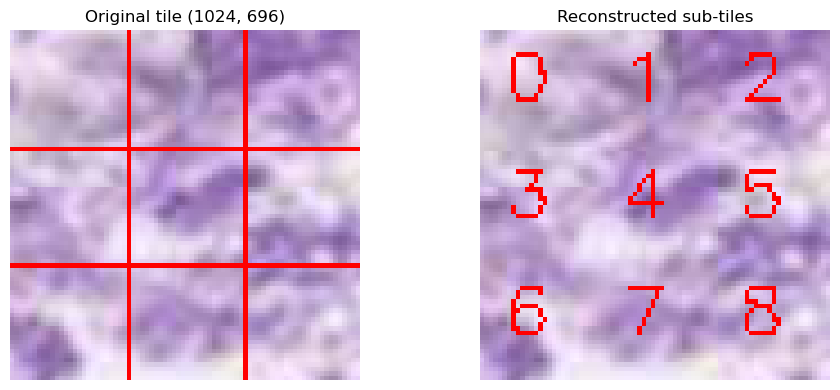

🧬 C1~C35 Expression Comparison:
Index         Original    SubTiles      Δ Diff
----------------------------------------
C1            -0.554     -0.554      0.000
C2             0.696      0.696      0.000
C3            -0.502     -0.502      0.000
C4            -0.410     -0.410      0.000
C5            -0.598     -0.598      0.000
C6            -0.406     -0.406      0.000
C7            -0.778     -0.778      0.000
C8            -0.273     -0.273      0.000
C9            -0.458     -0.458      0.000
C10           -0.394     -0.394      0.000
C11           -0.253     -0.253      0.000
C12           -0.769     -0.769      0.000
C13            0.845      0.845      0.000
C14            1.334      1.334      0.000
C15           -0.623     -0.623      0.000
C16           -0.718     -0.718      0.000
C17            2.842      2.842      0.000
C18           -0.644     -0.644      0.000
C19           -0.471     -0.471      0.000
C20           -0.725     -0.725      0.000
C21           -0.310

In [12]:
import random

# 隨機抽一筆資料（從全體 tiles 中）
i = random.randint(0, len(train_subtiles) - 1)

# 取對應的 sub-tiles 與 label
subtiles = train_subtiles[i]
label_tiles = train_labels[i]
slide_id, x, y = train_meta_info[i]  # 👈 slide 來源、spot 座標

# 從 HDF5 開檔案 → 抓對應 slide image
with h5py.File('../elucidata_ai_challenge_data.h5', 'r') as h5file:
    train_images = h5file['images/Train']
    image = train_images[slide_id][()]  # 👈 讀出 NumPy 陣列
    
# 找原始 label（可選）
row = train_spot_tables[slide_id]
row_match = row[(row['x'] == x) & (row['y'] == y)]
if len(row_match) == 0:
    print("⚠️ 找不到對應的 spot")
    label_gt = label_tiles  # fallback
else:
    label_gt = row_match.iloc[0].iloc[2:].values.astype(np.float32)

# 執行視覺化比對
print(f"Slides: {slide_id}")
compare_tile_and_label_visuals(image, x, y, subtiles, label_gt, label_tiles)


#### See whether the stribe window do it right

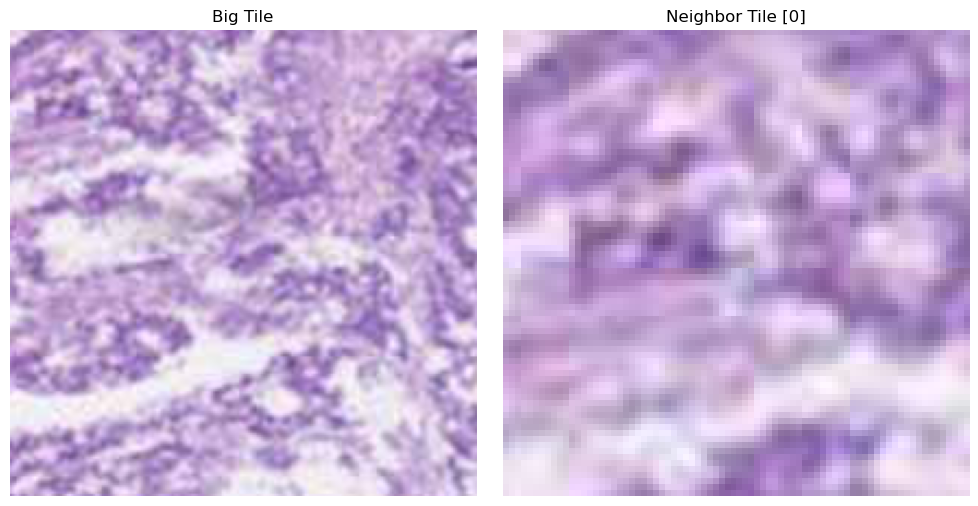

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左邊是大 tile
tile = extract_tile(image, x, y, tile_size=tile_size + stride*2)
axes[0].imshow(tile)
axes[0].set_title("Big Tile")
axes[0].axis("off")

# 右邊是某個 neighbor tile
negihbor_num = 0
neighbor_tile = train_neighbor_tiles[i][negihbor_num]
axes[1].imshow(neighbor_tile)
axes[1].set_title(f"Neighbor Tile [{negihbor_num}]")
axes[1].axis("off")

plt.tight_layout()
plt.show()


## Transfer into training dataset 

In [14]:
## Make sure I have all the data
total_spots = sum(len(df) for df in train_spot_tables.values())
print(f"Total number of spots across all slides: {total_spots}")

print(f"The spots in our preprocessing datasets: {len(train_tiles)}")

Total number of spots across all slides: 8349
The spots in our preprocessing datasets: 8349


In [15]:
train_labels

[array([-0.55044895, -0.38874105, -0.5216697 , -0.39555588,  0.04135292,
        -0.37761593, -0.48097387, -0.42561355, -0.43662527, -0.3719137 ,
        -0.02844713, -0.37448585, -0.43163574, -0.40695453, -0.43176034,
         3.287057  , -0.6639187 , -0.4550456 , -0.5058226 ,  0.20908636,
         2.8713083 , -0.44649127, -0.628477  , -0.5339308 ,  0.15563951,
        -0.33268616, -0.3864163 , -0.43867084,  0.05815353, -0.3260041 ,
        -0.47087702, -0.39576074, -0.41461617, -0.45805404,  0.28565794],
       dtype=float32),
 array([-0.25259906,  1.32519   , -0.13343418, -0.05532165,  3.0422716 ,
        -0.13618986,  1.8343501 , -0.08451448, -0.17850515, -0.3719137 ,
        -0.06493279,  0.91807055, -0.24448088, -0.55737495,  0.7022714 ,
         1.6119629 ,  1.3917178 , -0.05897864, -0.4239064 , -0.394532  ,
         0.7970989 ,  3.3808062 ,  0.46209595, -0.6504551 , -0.49483827,
        -0.3903803 , -0.07280026, -0.49525297,  1.4098048 , -0.32285002,
         1.9926236 ,  0.684

In [18]:
import torch
import os

output_dir = "train_dataset_sep"
os.makedirs(output_dir, exist_ok=True)

torch.save(train_tiles, os.path.join(output_dir, "tiles.pt"))
torch.save(train_subtiles, os.path.join(output_dir, "subtiles.pt"))
torch.save(train_neighbor_tiles, os.path.join(output_dir, "neighbor_tiles.pt"))
torch.save(train_labels, os.path.join(output_dir, "labels.pt"))
torch.save(train_meta_info, os.path.join(output_dir, "meta_info.pt"))

print("所有檔案分別儲存完成。")


所有檔案分別儲存完成。


In [17]:
train_meta_info

[('S_1', 1554, 1297),
 ('S_1', 462, 1502),
 ('S_1', 1488, 1548),
 ('S_1', 1725, 1182),
 ('S_1', 581, 1113),
 ('S_1', 765, 1342),
 ('S_1', 1304, 1640),
 ('S_1', 463, 998),
 ('S_1', 1252, 953),
 ('S_1', 1409, 1640),
 ('S_1', 1699, 679),
 ('S_1', 1094, 1182),
 ('S_1', 410, 815),
 ('S_1', 922, 1571),
 ('S_1', 936, 1410),
 ('S_1', 568, 1319),
 ('S_1', 410, 998),
 ('S_1', 1449, 1159),
 ('S_1', 1475, 1114),
 ('S_1', 1725, 862),
 ('S_1', 1120, 1228),
 ('S_1', 1251, 1365),
 ('S_1', 1356, 1640),
 ('S_1', 949, 1159),
 ('S_1', 1541, 1365),
 ('S_1', 1673, 633),
 ('S_1', 436, 1273),
 ('S_1', 884, 907),
 ('S_1', 976, 930),
 ('S_1', 1449, 747),
 ('S_1', 1725, 954),
 ('S_1', 620, 1410),
 ('S_1', 647, 1227),
 ('S_1', 765, 792),
 ('S_1', 699, 1548),
 ('S_1', 542, 815),
 ('S_1', 1435, 1319),
 ('S_1', 489, 1181),
 ('S_1', 620, 1502),
 ('S_1', 1699, 1274),
 ('S_1', 1515, 770),
 ('S_1', 896, 1616),
 ('S_1', 528, 975),
 ('S_1', 1698, 1457),
 ('S_1', 1475, 1068),
 ('S_1', 1422, 1205),
 ('S_1', 1291, 1571),
 ('

In [16]:
import torch

torch.save({
    'tiles': train_tiles,
    'subtiles': train_subtiles,
    'neighbor_tiles': train_neighbor_tiles,
    'labels': train_labels,
    'meta_info': train_meta_info
}, "train_dataset.pt")

: 

# Test data preparation

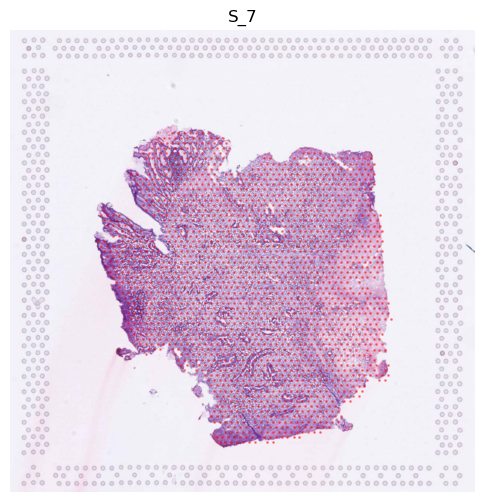

In [24]:
# Visualize Test slide ('S_7')
with h5py.File("./elucidata_ai_challenge_data.h5", "r") as h5file:
    test_images = h5file["images/Test"]
    test_spots = h5file["spots/Test"]
    
    sample = 'S_7'
    image = np.array(test_images[sample])
    spots = np.array(test_spots[sample])
    x, y = spots["x"], spots["y"]

    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

In [25]:
# Display spot table for Test slide (only the spot coordinates on 2D array)
with h5py.File("./elucidata_ai_challenge_data.h5", "r") as f:
    test_spots = f["spots/Test"]
    print(test_spots.keys())
    spot_array = np.array(test_spots['S_7'])
    test_spot_table = pd.DataFrame(spot_array)
    
# Show the test spots coordinates for slide 'S_7'
test_spot_table

<KeysViewHDF5 ['S_7']>


,x,y,Test_Set
0,1499,1260,2
1,1435,1503,2
2,558,1082,2
3,736,1304,1
4,1257,1592,1
...,...,...,...
2083,736,639,2
2084,1016,684,2
2085,1181,839,2
2086,735,1436,1


In [26]:
coords = test_spot_table[['x', 'y']].values
# 計算距離矩陣（所有 spot 之間）
dist_matrix = squareform(pdist(coords))  # shape = (N, N)

# 把對角線設為無限大（自己對自己不算）
np.fill_diagonal(dist_matrix, np.inf)

# 取得每個 spot 最近的一個鄰居距離
min_dists = dist_matrix.min(axis=1)

# 算平均距離
mean_spacing = min_dists.mean()

print(f"平均每個 spot 間距：約 {mean_spacing:.2f} pixels")

平均每個 spot 間距：約 25.01 pixels


In [27]:
test_tiles = []
test_subtiles = []
test_labels = []
test_neighbor_tiles = []
test_meta_info = []

with h5py.File("./elucidata_ai_challenge_data.h5", "r") as h5file:
    test_images = h5file["images/Test"]
    slide_ids = list(test_images.keys())  # e.g., only ['S_7']

    for slide_id in slide_ids:
        image = test_images[slide_id][()]  # 讀出唯一一張 test image

        # ✅ test_spot_table 是單一 DataFrame，不是 dict！
        df = test_spot_table  # 不用 [slide_id]！

        for i, row in df.iterrows():
            x, y = int(row['x']), int(row['y'])
            tile = extract_tile(image, x, y, tile_size=tile_size)
            subtiles = split_into_subtiles(tile, grid_size=3)
            label = np.zeros(35, dtype=np.float32)  # ⛔️沒有 label → 填空值
            neighbor_tiles = extract_neighbor_tiles_by_stride(image, x, y, tile_size, stride)


            test_tiles.append(tile)
            test_subtiles.append(subtiles)
            test_labels.append(label)
            test_neighbor_tiles.append(neighbor_tiles)  # ✅ 存入
            test_meta_info.append((slide_id, x, y))


In [ ]:
import h5py
import numpy as np

test_tiles = []
test_subtiles = []
test_labels = []
test_neighbor_tiles = []
test_meta_info = []

stride = 68

with h5py.File("./elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    slide_ids = list(train_spot_tables.keys())

    for slide_id in slide_ids:
        if slide_id not in train_images:
            print(f"⚠️ Slide {slide_id} not found in HDF5, skipping.")
            continue

        image = train_images[slide_id][()]  # H x W x 3
        df = train_spot_tables[slide_id]

        for i, row in df.iterrows():
            x, y = int(row['x']), int(row['y'])

            tile = extract_tile(image, x, y, tile_size=tile_size)
            subtiles = split_into_subtiles(tile, grid_size=3)
            neighbor_tiles = extract_neighbor_tiles_by_stride(image, x, y, tile_size, stride)

            label = row.iloc[2:].values.astype(np.float32)

            train_tiles.append(tile)
            train_subtiles.append(subtiles)
            train_neighbor_tiles.append(neighbor_tiles)  # ✅ 存入
            train_labels.append(label)
            train_meta_info.append((slide_id, x, y))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Slides: S_7


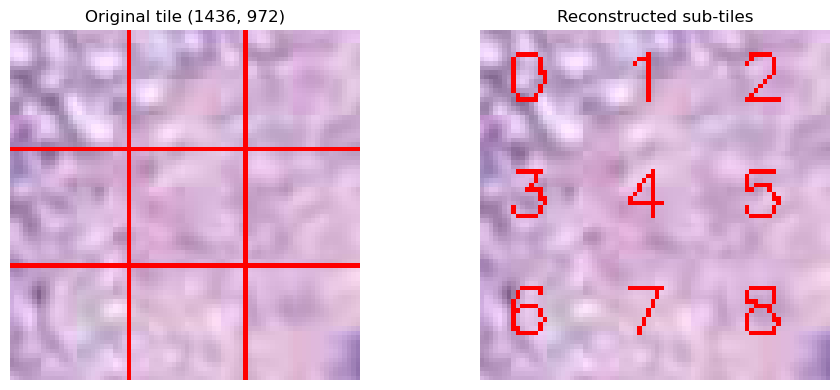

In [35]:
import random

# 隨機抽一筆資料（從全體 tiles 中）
i = random.randint(0, len(test_subtiles) - 1)

# 取對應的 sub-tiles 與 label
subtiles = test_subtiles[i]
label_tiles = test_labels[i]
slide_id, x, y = test_meta_info[i]  # 👈 slide 來源、spot 座標

with h5py.File('./elucidata_ai_challenge_data.h5', 'r') as h5file:
    test_images = h5file['images/Test']
    image = test_images[slide_id][()]
    
# 找原始 label（可選）
row_match = test_spot_table[(test_spot_table['x'] == x) & (test_spot_table['y'] == y)]

if len(row_match) == 0:
    print("⚠️ 找不到對應的 spot")
    label_gt = label_tiles  # fallback
else:
    label_gt = row_match.iloc[0].iloc[2:].values.astype(np.float32)

# 執行視覺化比對
print(f"Slides: {slide_id}")
compare_tile_and_label_visuals(image, x, y, subtiles)


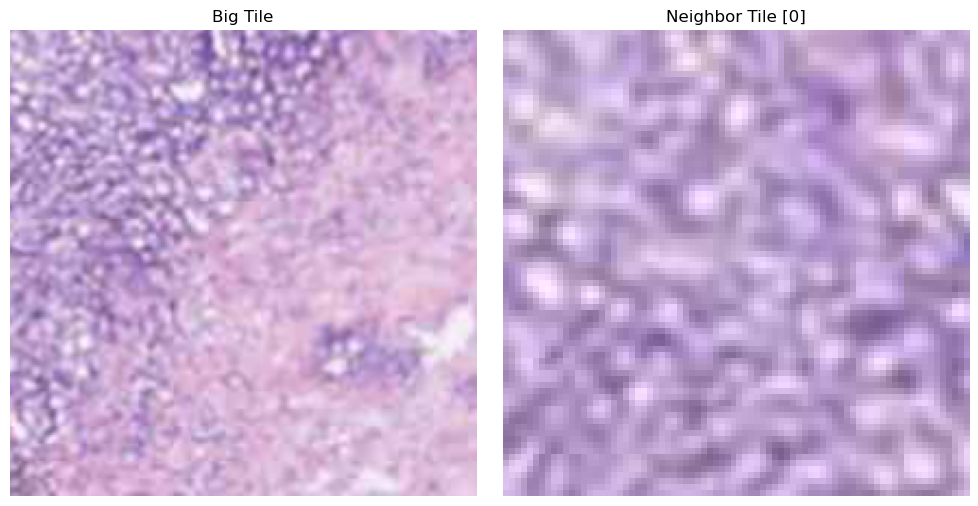

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左邊是大 tile
tile = extract_tile(image, x, y, tile_size=tile_size + stride*2)
axes[0].imshow(tile)
axes[0].set_title("Big Tile")
axes[0].axis("off")

# 右邊是某個 neighbor tile
negihbor_num = 0
neighbor_tile = test_neighbor_tiles[i][negihbor_num]
axes[1].imshow(neighbor_tile)
axes[1].set_title(f"Neighbor Tile [{negihbor_num}]")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
## Make sure I have all the data     

print(f"Total number of spots across all slides: {len(test_spot_table)}")

print(f"The spots in our preprocessing datasets: {len(test_tiles)}")

Total number of spots across all slides: 2088
The spots in our preprocessing datasets: 2088


In [37]:
torch.save({
    'tiles': test_tiles,
    'subtiles': test_subtiles,
    'neighbor_tiles': test_neighbor_tiles,
    'labels': test_labels,
    'meta_info': test_meta_info
}, "test_dataset.pt")